Download the datafile iris.data from the UCI Machine Learning Repository. This has five attributes with 150 instances. Ignore the last column of the data, which is a categorical attribute for the type of Iris flower.

# Import libraries and dataset

##### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [2]:
def import_dataset():
    df = pd.read_csv('data/iris.data', header=None)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    return df.drop(columns='class')

In [3]:
iris = import_dataset()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Kernel Feature Space

Compute the centered and normalized homogeneous quadratic kernel matrix K for the iris dataset using the kernel function in input space.

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
def quadratic_kernel_matrix(df:pd.DataFrame):
    X = df.values
    return (X @ X.T) ** 2

In [8]:
K = quadratic_kernel_matrix(iris)

In [9]:
K.shape

(150, 150)

In [10]:
def center_normalized_kernel(K: np.ndarray):
    n, _ = K.shape
    K_center = (np.eye(n, n) - np.ones((n, n))/n) @ K @ (np.eye(n, n) - np.ones((n, n))/n)                                                       
    W = np.diag(1 / np.sqrt(np.diag(K_center)))
    return W @ K_center @ W     

In [11]:
K_cn = center_normalized_kernel(K)

In [12]:
K_cn.shape

(150, 150)

Next, explicitly transform each point xi to the feature space ϕ(xi), using the homogeneous quadratic kernel. Center these points and normalize them. Finally verify that the pair-wise dot products of the centered and normalized points in feature space yield the same kernel matrix computed directly in input space via the kernel function. To do this, compute the matrix difference between the kernel matrices from the two approaches, and then print the sum of the differences

In [13]:
def transform_feature(df: pd.DataFrame):
    n, d = df.shape
    features = df ** 2
    for i, j in itertools.combinations(range(d), 2):
        features = pd.concat([features, np.sqrt(2) * df.iloc[:, i] * df.iloc[:, j]], axis=1, ignore_index=True)
    return features

In [14]:
feature_points = transform_feature(iris)
points_cn = feature_points.apply(lambda s: (s - s.mean()), axis=0).apply(lambda s: s / np.linalg.norm(s), axis=1)

In [15]:
K_cn_2 = points_cn @ points_cn.T

In [16]:
print((K_cn - K_cn_2).sum().sum())

3.747184854074881e-13


# Principal Components of Kernel Matrix

Compute the principal components (PCs) of the centered and normalized kernel matrix computed above. Note: in Python you may use numpy.linalg.eig; in R you may use eigen.

How many components are required to capture 90% of the total variance?

Project each of the original points/rows of K onto the first two PCs and create a scatter plot of the projected points. What is the range of values in each PC dimension?

In [17]:
w, v = np.linalg.eig(K_cn)

In [18]:
w = w.real

In [19]:
# 2 components are required to capture 90% of the total variance
(w.cumsum() / w.sum() > 0.9).argmax() + 1

2

In [20]:
pc1 = v[:, 0].real
pc2 = v[:, 1].real

In [21]:
pc1_coordinate = K_cn @ pc1

In [22]:
pc2_coordinate = K_cn @ pc2

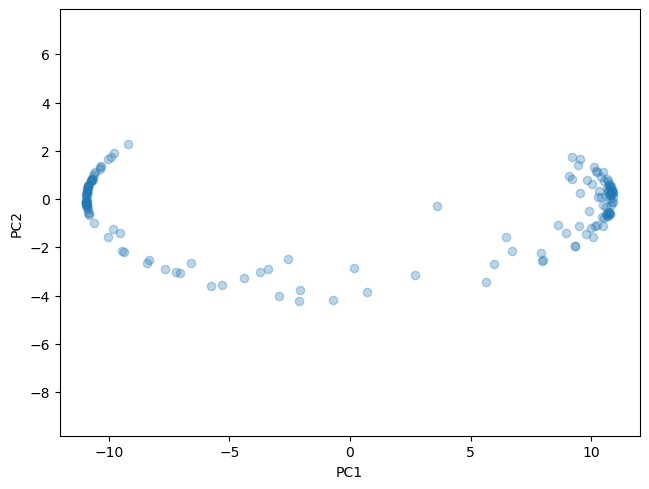

In [23]:
fig, ax = plt.subplots()
ax.scatter(pc1_coordinate, pc2_coordinate, alpha=0.3)
plt.tight_layout()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.axis('equal')
plt.show()